<font size = 5>**LAB 13 PART2**</font>

3) Taking any two classes from the above data, add labels to them (0 or 1) and create a new csv file. Split the data into Train / Test set as 70/30. (a) Plot the decision boundary using the developed logistic regression code (either with or without regularization) from one of your previous labs. (b) Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data without using any library.  (10 marks)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
np.random.seed(25)

#Below generates a point given centre (x,y) and radius
#I am looping so that the points are generated with uniform distribution across the circle

def gen_circle_point(x,y,r,target):
    while(True):
        x1 = np.random.uniform(-r,r)
        y1 = np.random.uniform(-r,r)
        if(x1**2 + y1**2 < r**2):
            return list([x+x1,y+y1,target])
    

#Below generates OUR required data -- TWO classes Exactly
def gen_data():
    lst = []
    for i in range(10):
        lst.append(gen_circle_point(3,3,2,0))
    for i in range(10):
        lst.append(gen_circle_point(7,7,2,1))
    df = pd.DataFrame(lst,columns=["x","y","target"])
    df.to_csv("data.csv")
    
gen_data()

In [53]:

#Read the dataframe
df = pd.read_csv("data.csv",usecols = ["x","y","target"])

#Shuffle the dataframe
df = df.sample(frac = 1).reset_index(drop=True)

#Get the features and split
X_train = np.array(df[["x","y"]])[:14]
X_train = X_train.T
#Add the x0 feature
ones = np.ones(14)
X_train = np.concatenate(([ones],X_train),axis = 0)

#Get the test features
X_test = np.array(df[["x","y"]])[14:]
X_test = X_test.T
ones = np.ones(6)
X_test = np.concatenate(([ones],X_test),axis = 0)

#--------------------------------------------------------------

#Target splitting 
target_train = np.array(df["target"])[:14]
target_train = target_train.reshape((1,14))
target_test = np.array(df["target"])[14:]
target_test = target_test.reshape((1,6))



(a) Plot the decision boundary using the developed logistic regression code (either with or without regularization) from one of your previous labs

In [54]:

#sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

#Found the loss and gradient as done in lectures
def loss_log(w,x,y):
    m = x.shape[0]
    
    sig_arr = sigmoid(w@x)
    losses = -y*np.log(sig_arr)-(1-y)*np.log(1-sig_arr)
    
    return np.sum(losses)/(2*m)

def grad_log(w,x,y):
    pred = sigmoid(w@x)
    m = x.shape[0]
    return ((pred-y)@x.T)/m
    
class log_reg:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def gradient_descent(self,num_iter,alpha):
        losses = []
        n = self.x.shape[0]
        m = self.x.shape[1] 
        w = np.random.rand(1,n) #initially set random weights 
        for i in range(0,num_iter):
            losses.append(loss_log(w,self.x,self.y))
            grad = grad_log(w,self.x,self.y)
            w = w - grad*alpha
        return w,losses


In [56]:

#Gradient descent

model = log_reg(X_train,target_train)
weights,losses = model.gradient_descent(10000,0.001)

#Find the predicted test target classes from the test features
predicted = weights@X_test
for i in range(6):
    if(predicted[0][i] < 0.5):
        predicted[0][i] = 0
    else:
        predicted[0][i] = 1
        
print(predicted,target_test)


[[0. 0. 1. 0. 1. 1.]] [[0 0 1 0 1 1]]


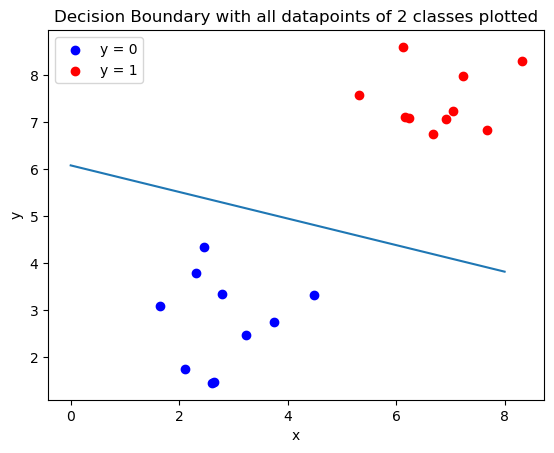

In [59]:

df1 = df[df["target"] == 0]
df2 = df[df["target"] == 1]

#Plot the points x1 versus x2
plt.scatter(np.array(df1["x"]),np.array(df1["y"]),color = "blue",label = "y = 0")
plt.scatter(np.array(df2["x"]),np.array(df2["y"]),color = "red",label = "y = 1")
plt.title("Decision Boundary with all datapoints of 2 classes plotted")
plt.xlabel("x")
plt.ylabel("y")

plt.legend()



#Plotting the boundary now
# w0 + w1x + w2y = 0
# y = -w1/w2 x - w0 /w2

m = -weights[0][1]/weights[0][2]
c = -weights[0][0]/weights[0][2]
linex = np.linspace(0,8,100)
liney = linex*m + c
plt.plot(linex,liney)


 (b) Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data without using any library.

In [58]:

#Evaluation metrics on the test data -- has only 6 samples

True_Positive = 0
False_Positive = 0
True_Negative = 0
False_Negative = 0

for i in range(6):
    if(predicted[0][i] == 1 and target_test[0][i] == 1):
        True_Positive = 1 + True_Positive
    elif(predicted[0][i] == 1 and target_test[0][i] == 0):
        False_Positive = 1 + False_Positive
    elif(predicted[0][i] == 0 and target_test[0][i] == 0):
        True_Negative = 1 + True_Negative
    else:
        False_Negative = 1 + False_Negative


Precision = True_Positive/(True_Positive + False_Positive)
Recall = True_Positive/(True_Positive + False_Negative)
F1_score = 2*Precision*Recall/(Precision+Recall)
Accuracy = (True_Positive+True_Negative)/(True_Positive + True_Negative + False_Negative + False_Positive)

print(f'''Precision: {Precision}
Recall: {Recall}
F1_score: {F1_score}
Accuracy: {Accuracy}''')

Precision: 1.0
Recall: 1.0
F1_score: 1.0
Accuracy: 1.0
